 1. Normal Distribution (IMDb Ratings)

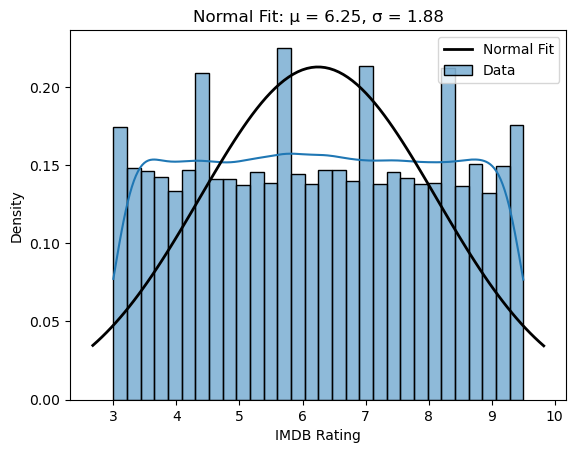

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np


# Load dataset
df = pd.read_csv("netflix_movies_series_final.csv")
 


# Drop rows with missing IMDb Ratings
df = df.dropna(subset=['IMDB Rating'])

# Fit a normal distribution
mu = df['IMDB Rating'].mean()
sigma = df['IMDB Rating'].std()

# Plot
sns.histplot(df['IMDB Rating'], kde=True, stat='density', bins=30, label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
plt.title(f'Normal Fit: μ = {mu:.2f}, σ = {sigma:.2f}')
plt.legend()
plt.show()



2. Binomial Distribution (IMDB Ratings)

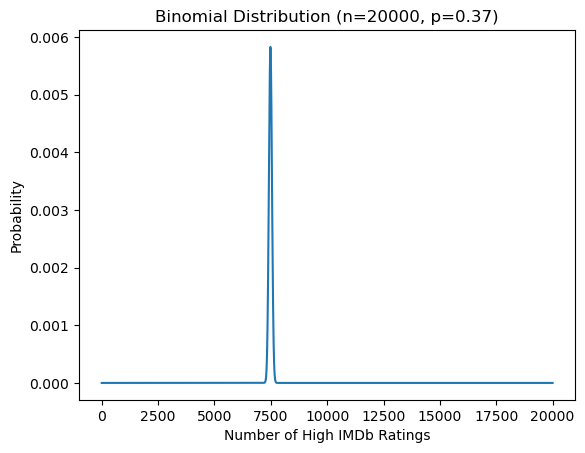

In [19]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# Create binary variable
df['High_IMDb'] = df['IMDB Rating'] > 7  # Updated column name

# Count of trials and successes
n = len(df)
k = df['High_IMDb'].sum()
p = k / n  # success probability

# Plot binomial distribution
x = range(n)
prob = binom.pmf(x, n, p)

plt.plot(x, prob)
plt.title(f'Binomial Distribution (n={n}, p={p:.2f})')
plt.xlabel('Number of High IMDb Ratings')
plt.ylabel('Probability')
plt.show()


3. Poisson Distribution(Avg. Watch Time)

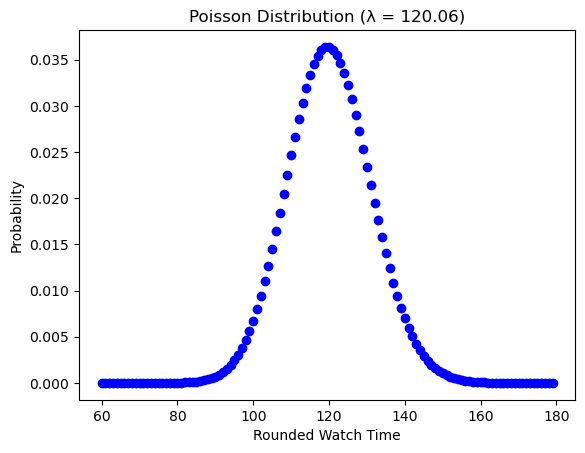

In [27]:
from scipy.stats import poisson

# Example with Watch Time rounded as count data
df['Watch Time Rounded'] = df['Avg User Watch Time (Minutes)'].round()

# Fit Poisson
lambda_ = df['Watch Time Rounded'].mean()

# Plot
x = range(int(df['Watch Time Rounded'].min()), int(df['Watch Time Rounded'].max()))
y = poisson.pmf(x, lambda_)

plt.plot(x, y, 'bo')
plt.title(f'Poisson Distribution (λ = {lambda_:.2f})')
plt.xlabel('Rounded Watch Time')
plt.ylabel('Probability')
plt.show()


In [25]:
print(df.columns)

Index(['Movie Name', 'IMDB Rating', 'Budget (Million $)',
       'Revenue (Million $)', 'Avg User Watch Time (Minutes)', 'Type',
       'High_IMDb'],
      dtype='object')


4. Bayes’ Theorem Application
Question: What is the probability that a movie is high revenue (>500M) given high IMDb (>7)?

In [40]:
# Conditions
df['High_Revenue'] = df['Revenue (Million $)'] > 500
df['High_IMDb'] = df['IMDB Rating'] > 7

# P(High Revenue)
P_HR = df['High_Revenue'].mean()

# P(High IMDb)
P_HI = df['High_IMDb'].mean()

# P(High IMDb | High Revenue)
P_HI_given_HR = df[df['High_Revenue']]['High_IMDb'].mean()

# Apply Bayes' Theorem
P_HR_given_HI = (P_HI_given_HR * P_HR) / P_HI

print(f"P(High Revenue | High IMDb) = {P_HR_given_HI:.4f}")


P(High Revenue | High IMDb) = 0.3310
